In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from tqdm import tqdm

In [4]:
base_path = '/home/rsaha/projects/dm_alchemy/src/saved_models/'
architecture = 'encoder'
model_size = 'xsmall'
task_type = 'classification_multi_label'
shop = '2'
qhop = '1'
seed_list = [0, 1, 2]
epoch_num = 7

file_path = f'{base_path}{model_size}/{architecture}/{task_type}/shop_{shop}_qhop_{qhop}/'

In [5]:
predictions_list = []
targets_list = []

epochs = 60
for seed in tqdm(seed_list):
    seed_x_predictions = []
    seed_x_targets = []
    for epoch in range(epochs):
        file_name = f'{file_path}seed_{seed}/predictions/predictions_{task_type}_epoch_{epoch+1:03d}.npz'
        predictions = np.load(file_name, allow_pickle=True)['predictions']
        seed_x_predictions.append(predictions)
    predictions_list.append(np.array(seed_x_predictions))
        
    for epoch in range(epochs):
        file_name = f'{file_path}seed_{seed}/predictions/targets_{task_type}_epoch_{epoch+1:03d}.npz'
        targets = np.load(file_name, allow_pickle=True)['targets']
        seed_x_targets.append(targets)
    targets_list.append(np.array(seed_x_targets))
   

100%|██████████| 3/3 [00:36<00:00, 12.02s/it]


In [ ]:
predictions_list[0]

array([[[0, 1, 0, ..., 0, 1, 0],
        [0, 1, 0, ..., 0, 1, 0],
        [1, 0, 0, ..., 1, 0, 0],
        ...,
        [0, 0, 1, ..., 0, 1, 0],
        [0, 0, 1, ..., 0, 1, 0],
        [0, 0, 1, ..., 0, 1, 0]],

       [[0, 1, 0, ..., 0, 1, 0],
        [0, 1, 0, ..., 0, 1, 0],
        [1, 0, 0, ..., 1, 0, 0],
        ...,
        [1, 0, 0, ..., 0, 1, 0],
        [1, 0, 0, ..., 0, 1, 0],
        [1, 0, 0, ..., 0, 1, 0]],

       [[0, 1, 0, ..., 0, 1, 0],
        [0, 1, 0, ..., 0, 1, 0],
        [1, 0, 0, ..., 1, 0, 0],
        ...,
        [1, 0, 0, ..., 0, 1, 0],
        [1, 0, 0, ..., 0, 1, 0],
        [1, 0, 0, ..., 0, 1, 0]],

       ...,

       [[0, 1, 0, ..., 0, 1, 0],
        [0, 1, 0, ..., 0, 1, 0],
        [1, 0, 0, ..., 1, 0, 0],
        ...,
        [0, 0, 1, ..., 0, 1, 0],
        [0, 1, 0, ..., 0, 1, 0],
        [1, 0, 0, ..., 0, 1, 0]],

       [[0, 1, 0, ..., 0, 1, 0],
        [0, 1, 0, ..., 0, 1, 0],
        [1, 0, 0, ..., 1, 0, 0],
        ...,
        [0, 0, 1, ..., 

In [ ]:
# for seed_idx, seed_predictions in enumerate(predictions_list):
seed_idx = 0
seed_predictions = predictions_list[seed_idx]
for epoch_idx, epoch_predictions in enumerate(seed_predictions):
    if epoch_predictions.shape != predictions_list[0][1].shape:
        print("epoch_predictions shape:", epoch_predictions.shape)
        file_name = f'{file_path}seed_{seed_list[seed_idx]}/predictions/predictions_{task_type}_epoch_{epoch_idx+1:03d}.npz'
        print(f"Shape mismatch found in file: {file_name}")

In [ ]:
predictions_list[0].shape

(60, 265384, 13)

In [ ]:
# Create a dummy array with shape (3, *predictions_list[0].shape)
dummy_array = np.zeros((len(seed_list), *predictions_list[0].shape))

for seed_idx in seed_list:
    print(f"Processing seed {seed_idx}...")
    dummy_array[seed_idx] = predictions_list[seed_idx]

Processing seed 0...


In [ ]:
dummy_array.shape

(1, 60, 265384, 13)

In [ ]:
# len(predictions_list[0][1])

265384

In [ ]:
# Average the predictions across seeds.
# predictions_list = np.array(predictions_list)
# predictions_list = np.mean(predictions_list, axis=0)
# # Average the targets across seeds.
# targets_list = np.array(targets_list)
# targets_list = np.mean(targets_list, axis=0)

 

In [ ]:
predictions_list.shape

(60, 265384, 13)

In [ ]:
print("For epoch 0, the predictions have the following form: ", predictions_list[0])
print("For epoch 0, the targets have the following form: ", targets_list[0])
print("The shape of predictions is: ", predictions_list[0].shape)

print("Let's consider the first 3 dimensions for the predictions and targets.")
print("They refer to the following: \n color. \n the next three features refer to the size, \n \
    the next three features refer to the shape, \n and the final four features refer to the 'value' of the stone")
print("I want to plot the confusion matrix for each 'feature' in the predictions and targets.")
print("I should also say that predictions_list, and targets_list have 60 elements - each element is an \
    numpy array of many rows and 13 columns (divided into groups as described above).")
print("Only consider the last epoch for the confusion matrix because that's where the model training stopped.")



For epoch 0, the predictions have the following form:  [[[0 1 0 ... 0 1 0]
  [0 1 0 ... 0 1 0]
  [1 0 0 ... 1 0 0]
  ...
  [0 0 1 ... 0 1 0]
  [0 0 1 ... 0 1 0]
  [0 0 1 ... 0 1 0]]

 [[0 1 0 ... 0 1 0]
  [0 1 0 ... 0 1 0]
  [1 0 0 ... 1 0 0]
  ...
  [1 0 0 ... 0 1 0]
  [1 0 0 ... 0 1 0]
  [1 0 0 ... 0 1 0]]

 [[0 1 0 ... 0 1 0]
  [0 1 0 ... 0 1 0]
  [1 0 0 ... 1 0 0]
  ...
  [1 0 0 ... 0 1 0]
  [1 0 0 ... 0 1 0]
  [1 0 0 ... 0 1 0]]

 ...

 [[0 1 0 ... 0 1 0]
  [0 1 0 ... 0 1 0]
  [1 0 0 ... 1 0 0]
  ...
  [0 0 1 ... 0 1 0]
  [0 1 0 ... 0 1 0]
  [1 0 0 ... 0 1 0]]

 [[0 1 0 ... 0 1 0]
  [0 1 0 ... 0 1 0]
  [1 0 0 ... 1 0 0]
  ...
  [0 0 1 ... 0 1 0]
  [0 1 0 ... 0 1 0]
  [1 0 0 ... 0 1 0]]

 [[0 1 0 ... 0 1 0]
  [0 1 0 ... 0 1 0]
  [1 0 0 ... 1 0 0]
  ...
  [0 0 1 ... 0 1 0]
  [0 1 0 ... 0 1 0]
  [1 0 0 ... 0 1 0]]]
For epoch 0, the targets have the following form:  [[[0 1 0 ... 0 1 0]
  [0 1 0 ... 0 1 0]
  [1 0 0 ... 1 0 0]
  ...
  [0 0 1 ... 0 1 0]
  [0 1 0 ... 0 1 0]
  [1 0 0 ... 0

Total sum of the confusion matrix: 265384
Total sum of the confusion matrix: 265384
Total sum of the confusion matrix: 265384
Total sum of the confusion matrix: 265384


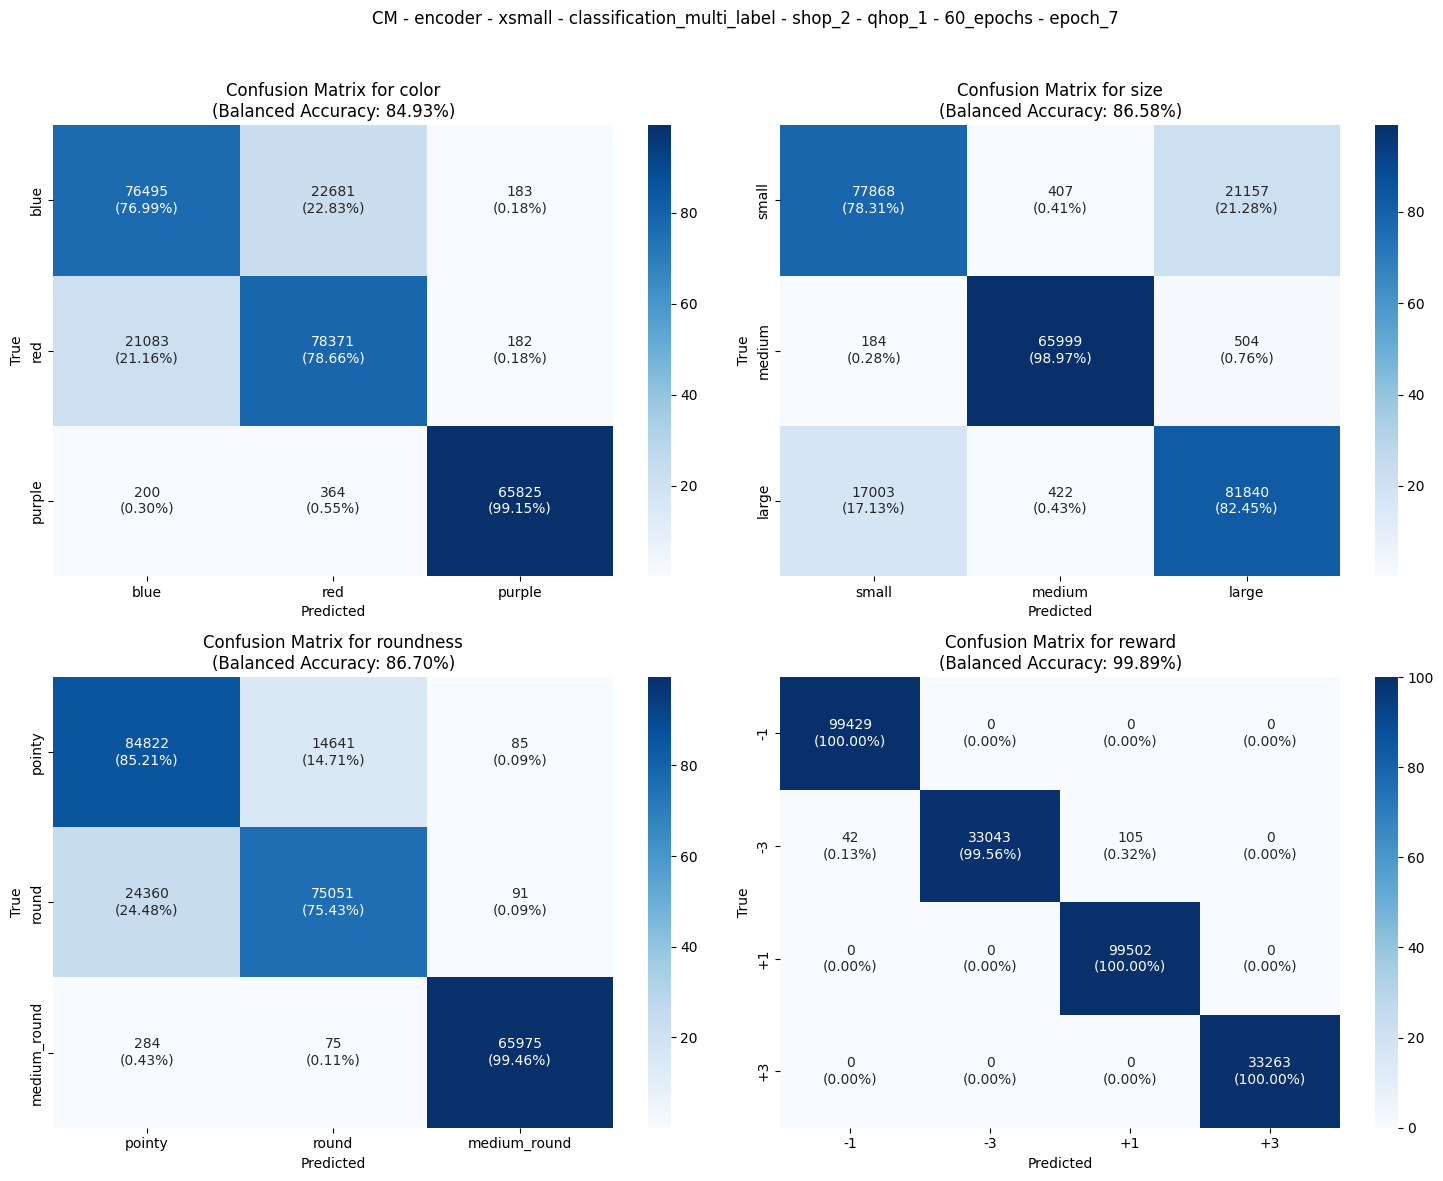

In [ ]:
# Get the last epoch's predictions and targets
seed_idx = 0
array_predictions_list = np.array(predictions_list[seed_idx])
array_targets_list = np.array(targets_list[seed_idx])
last_epoch_predictions = array_predictions_list[epoch_num - 1]
last_epoch_targets = array_targets_list[epoch_num - 1]

# Define feature slices and names
feature_slices = {
    'color': slice(0, 3),
    'size': slice(3, 6),
    'roundness': slice(6, 9),
    'reward': slice(9, 13)
}

feature_names = {
    'color': ['blue', 'red', 'purple'],
    'size': ['small', 'medium', 'large'],
    'roundness': ['pointy', 'round', 'medium_round'],
    'reward': ['-1', '-3', '+1', '+3']
}

# Plot confusion matrix for each feature
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

for i, (feature, feature_slice) in enumerate(feature_slices.items()):
    pred_feature = last_epoch_predictions[:, feature_slice]
    target_feature = last_epoch_targets[:, feature_slice]
    
    pred_labels = np.argmax(pred_feature, axis=1)
    target_labels = np.argmax(target_feature, axis=1)
    
    cm = confusion_matrix(target_labels, pred_labels)
    
    with np.errstate(divide='ignore', invalid='ignore'): # Handle cases with no true samples for a class
        recalls = np.diag(cm) / np.sum(cm, axis=1)
        recalls[np.isnan(recalls)] = 0 # If a class has 0 samples, its recall is 0
    balanced_accuracy = np.mean(recalls) * 100

    cm_percentage = cm / cm.sum(axis=1, keepdims=True) * 100
    print("Total sum of the confusion matrix:", cm.sum())
    
    # Combine raw values and percentages into a single string for annotation
    annotations = np.empty_like(cm, dtype=object)
    for row in range(cm.shape[0]):
        for col in range(cm.shape[1]):
            annotations[row, col] = f"{cm[row, col]}\n({cm_percentage[row, col]:.2f}%)"
    
    sns.heatmap(cm_percentage, annot=annotations, fmt='', cmap='Blues', 
                xticklabels=feature_names[feature], 
                yticklabels=feature_names[feature],
                ax=axes[i])
    
    axes[i].set_title(f'Confusion Matrix for {feature}\n(Balanced Accuracy: {balanced_accuracy:.2f}%)')
    
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('True')


title = f"CM - {architecture} - {model_size} - {task_type} - shop_{shop} - qhop_{qhop} - {epochs}_epochs - epoch_{epoch_num}"
fig.suptitle(title)
plt.tight_layout(rect=[0, 0, 1, 0.96]) # Adjust rect to make space for suptitle
plt.show()

# Plotting the accuracy values for each feature group of the predictions.

In [ ]:
predictions_list.shape

(60, 265384, 13)

100%|██████████| 60/60 [00:05<00:00, 11.23it/s]


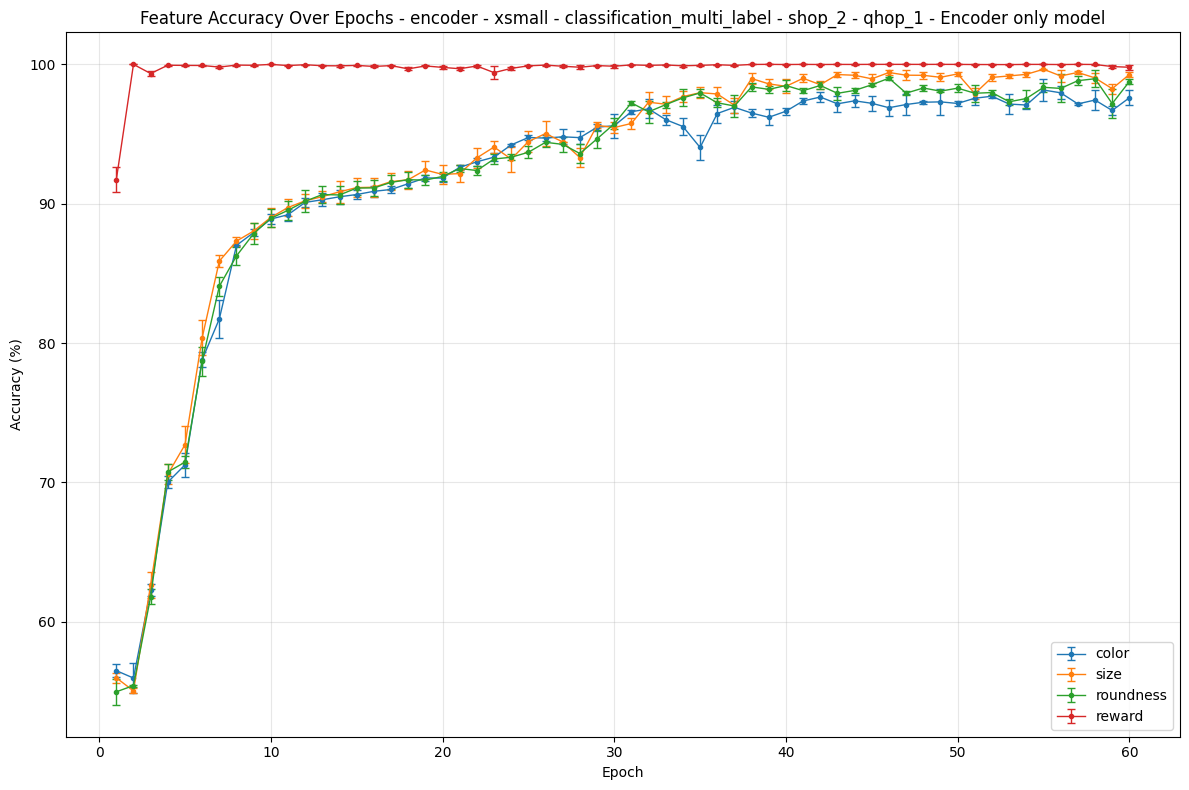

In [ ]:
# Instead of considering the last epoch, we can consider all epochs and plot the accuracy for each feature for each epoch.
# This will give us a line graph for each feature showing how the accuracy changes over epochs.

# Define feature slices and names
feature_slices = {
    'color': slice(0, 3),
    'size': slice(3, 6),
    'roundness': slice(6, 9),
    'reward': slice(9, 13)
}


# Initialize lists to store accuracies for each feature across epochs and seeds
accuracies_all_seeds = {feature: [] for feature in feature_slices.keys()}

# Loop through each seed
for seed_idx in range(len(seed_list)):
    seed_accuracies = {feature: [] for feature in feature_slices.keys()}
    
    # Convert to numpy array for easier indexing
    seed_predictions = np.array(predictions_list[seed_idx])
    seed_targets = np.array(targets_list[seed_idx])
    
    # Loop through each epoch for this seed
    for epoch_idx in tqdm(range(len(seed_predictions))):
        
        for feature, feature_slice in feature_slices.items():
            pred_feature = seed_predictions[epoch_idx, :, feature_slice]
            target_feature = seed_targets[epoch_idx, :, feature_slice]
            
            pred_labels = np.argmax(pred_feature, axis=1)
            target_labels = np.argmax(target_feature, axis=1)
            
            accuracy = np.mean(pred_labels == target_labels) * 100
            seed_accuracies[feature].append(accuracy)
    
    # Store this seed's accuracies
    for feature in feature_slices.keys():
        accuracies_all_seeds[feature].append(seed_accuracies[feature])

# Convert to numpy arrays and calculate mean and standard error
mean_accuracies = {}
std_errors = {}

for feature in feature_slices.keys():
    # Convert to numpy array: shape (num_seeds, num_epochs)
    feature_accuracies = np.array(accuracies_all_seeds[feature])
    mean_accuracies[feature] = np.mean(feature_accuracies, axis=0)
    std_errors[feature] = np.std(feature_accuracies, axis=0) / np.sqrt(len(seed_list))

# Plotting the accuracies for each feature across epochs with error bars
plt.figure(figsize=(12, 8))
for feature in feature_slices.keys():
    epochs_range = range(1, len(mean_accuracies[feature]) + 1)
    plt.errorbar(epochs_range, mean_accuracies[feature], yerr=std_errors[feature], 
                label=feature, marker='o', markersize=3, linewidth=1, capsize=3)

plt.title(f'Feature Accuracy Over Epochs - {architecture} - {model_size} - {task_type} - shop_{shop} - qhop_{qhop} - Encoder only model')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Investigate the incorrect predictions.


In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from tqdm import tqdm

In [7]:
base_path = '/home/rsaha/projects/dm_alchemy/src/saved_models/'
architecture = 'encoder'
model_size = 'xsmall'
task_type = 'classification_multi_label'
shop = '2'
qhop = '1'
seed_list = [0, 1, 2]
epoch_num = 7

file_path = f'{base_path}{model_size}/{architecture}/{task_type}/shop_{shop}_qhop_{qhop}/'

In [8]:
predictions_list = []
targets_list = []

epochs = 60
for seed in tqdm(seed_list):
    seed_x_predictions = []
    seed_x_targets = []
    for epoch in range(epochs):
        file_name = f'{file_path}seed_{seed}/predictions/predictions_{task_type}_epoch_{epoch+1:03d}.npz'
        predictions = np.load(file_name, allow_pickle=True)['predictions']
        seed_x_predictions.append(predictions)
    predictions_list.append(np.array(seed_x_predictions))
        
    for epoch in range(epochs):
        file_name = f'{file_path}seed_{seed}/predictions/targets_{task_type}_epoch_{epoch+1:03d}.npz'
        targets = np.load(file_name, allow_pickle=True)['targets']
        seed_x_targets.append(targets)
    targets_list.append(np.array(seed_x_targets))
   

100%|██████████| 3/3 [00:29<00:00,  9.79s/it]



=== SEED 0 ===


Processing epochs for seed 0: 100%|██████████| 60/60 [00:09<00:00,  6.44it/s]




=== SEED 1 ===


Processing epochs for seed 1: 100%|██████████| 60/60 [00:09<00:00,  6.22it/s]



=== SEED 2 ===


Processing epochs for seed 2: 100%|██████████| 60/60 [00:09<00:00,  6.52it/s]




AVERAGE MISCLASSIFICATIONS ACROSS SEEDS

--- COLOR FEATURE ANALYSIS ---
Most common misclassifications (averaged across seeds):
  predicted_red_actual_blue: 607244.0 times (average)
  predicted_blue_actual_red: 553401.7 times (average)
  predicted_purple_actual_blue: 69294.7 times (average)
  predicted_purple_actual_red: 68790.3 times (average)
  predicted_blue_actual_purple: 13407.7 times (average)
  predicted_red_actual_purple: 13173.7 times (average)

--- SIZE FEATURE ANALYSIS ---
Most common misclassifications (averaged across seeds):
  predicted_large_actual_small: 503420.7 times (average)
  predicted_small_actual_large: 500063.7 times (average)
  predicted_medium_actual_large: 76780.3 times (average)
  predicted_medium_actual_small: 76474.3 times (average)
  predicted_large_actual_medium: 7373.3 times (average)
  predicted_small_actual_medium: 7328.0 times (average)

--- ROUNDNESS FEATURE ANALYSIS ---
Most common misclassifications (averaged across seeds):
  predicted_pointy_act

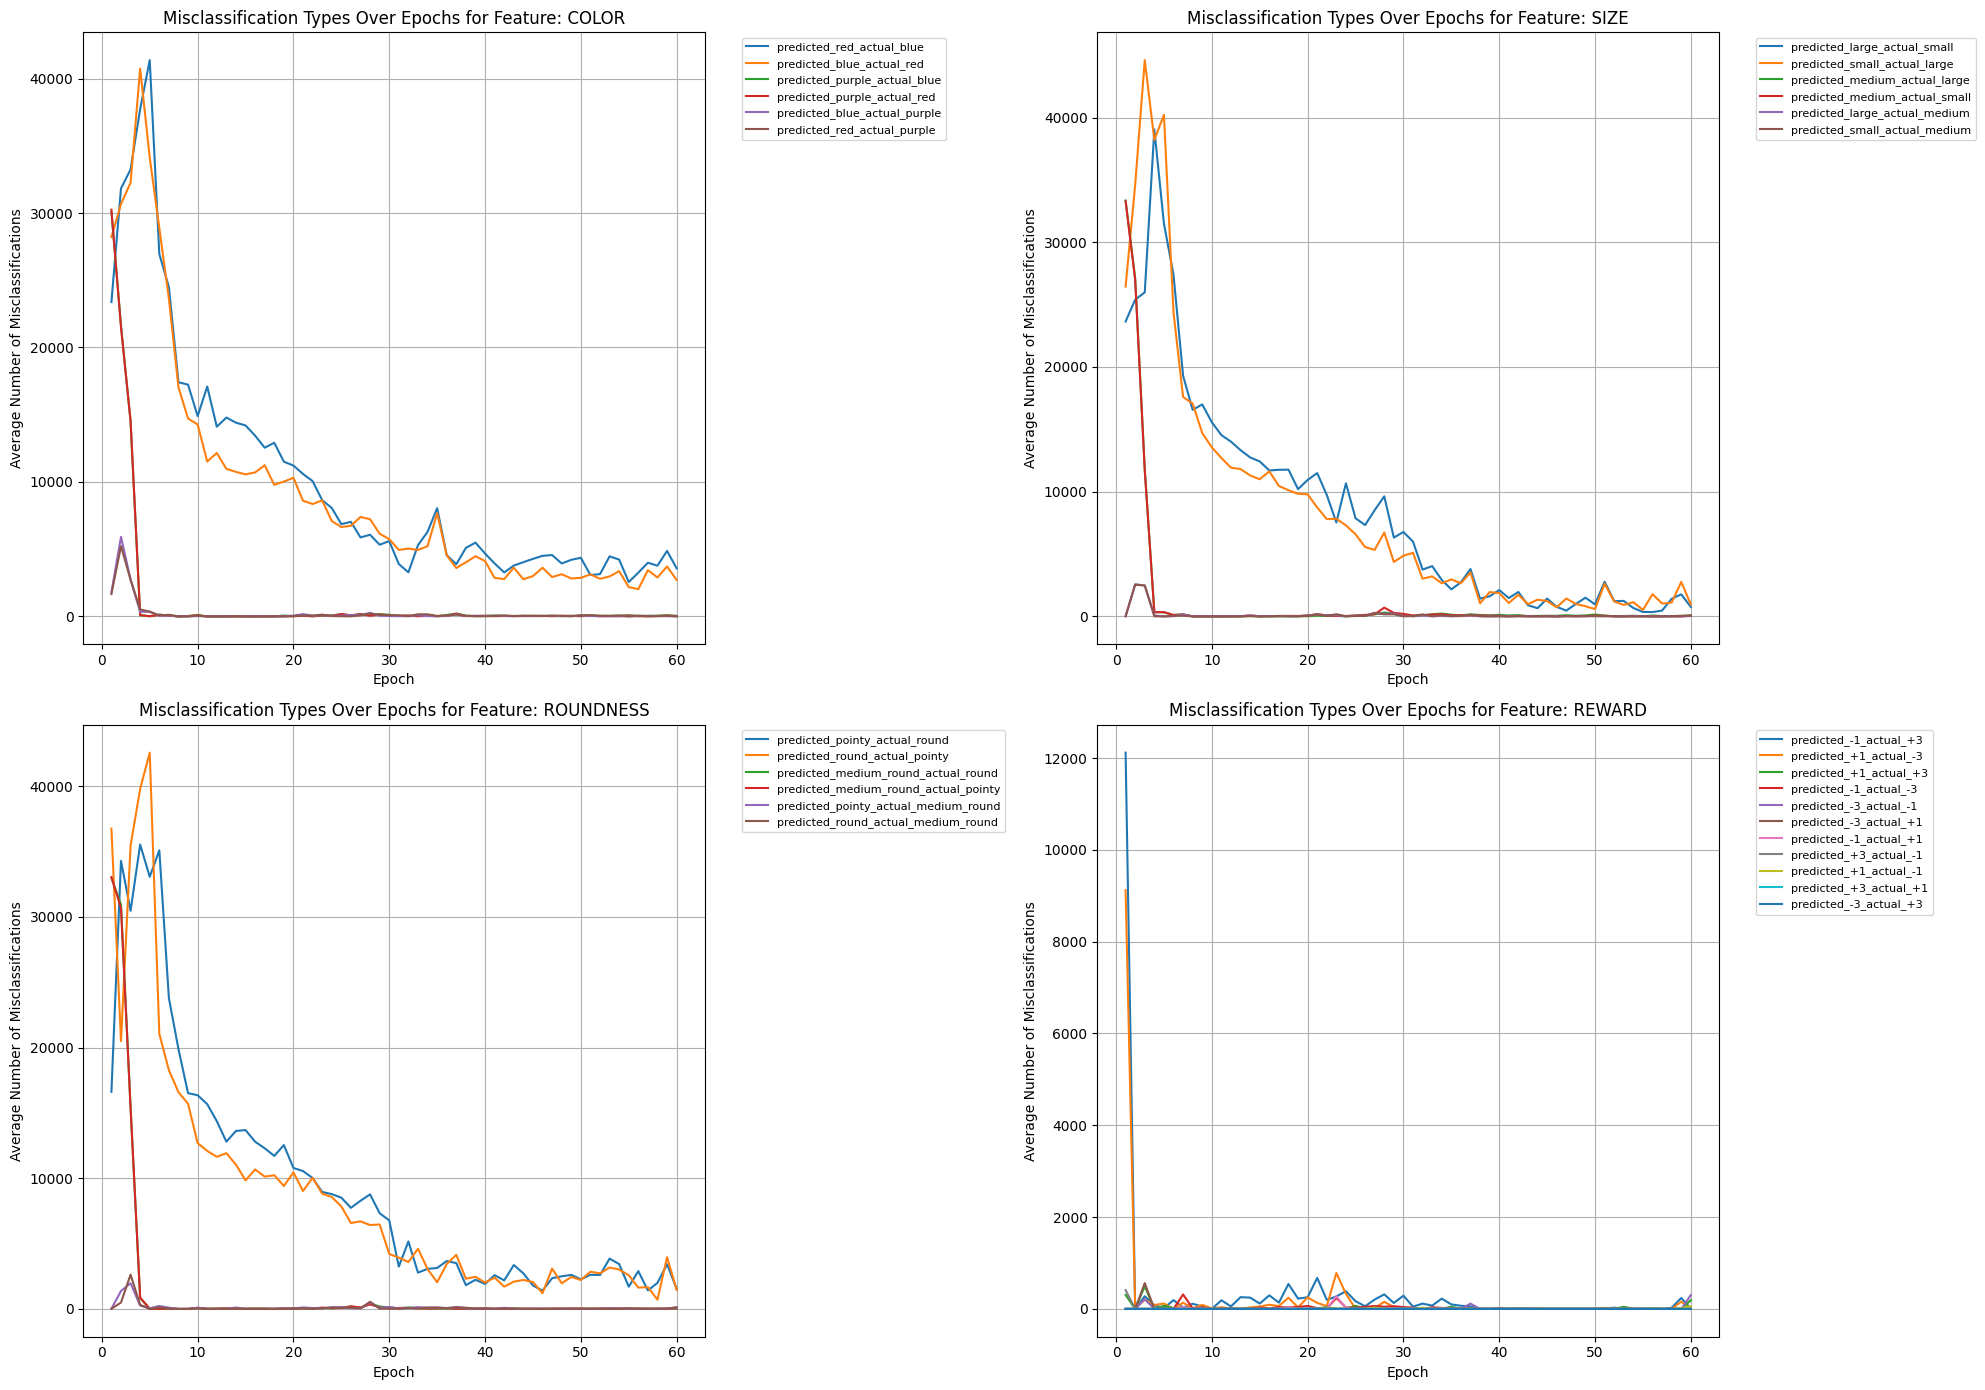

In [11]:
# Now we investigate the incorrect predictions and targets for each seed and for each feature for all epochs.
feature_slices = {
    'color': slice(0, 3),
    'size': slice(3, 6),
    'roundness': slice(6, 9),
    'reward': slice(9, 13)
}

feature_names = {
    'color': ['blue', 'red', 'purple'],
    'size': ['small', 'medium', 'large'],
    'roundness': ['pointy', 'round', 'medium_round'],
    'reward': ['-1', '-3', '+1', '+3']
}
# Initialize lists to store accuracies for each feature across epochs and seeds
accuracies_all_seeds_per_feature = {feature: [] for feature in feature_slices.keys()}

# Initialize storage for epoch-wise misclassification counts
epoch_wise_misclass = {}

# Loop through each seed
for seed_idx in range(len(seed_list)):
    print(f"\n=== SEED {seed_list[seed_idx]} ===")
    
    # Convert to numpy array for easier indexing
    seed_predictions = np.array(predictions_list[seed_idx])
    seed_targets = np.array(targets_list[seed_idx])
    
    # Initialize dictionaries to store misclassification analysis
    seed_misclassification_analysis = {feature: {'predicted_to_actual': {}, 'counts': {}} for feature in feature_slices.keys()}
    
    # Initialize epoch-wise storage for this seed
    seed_key = f'seed_{seed_list[seed_idx]}'
    epoch_wise_misclass[seed_key] = {feature: {} for feature in feature_slices.keys()}
    
    # Loop through each epoch for this seed
    for epoch_idx in tqdm(range(len(seed_predictions)), desc=f"Processing epochs for seed {seed_list[seed_idx]}"):
        
        for feature, feature_slice in feature_slices.items():
            pred_feature = seed_predictions[epoch_idx, :, feature_slice]
            target_feature = seed_targets[epoch_idx, :, feature_slice]
            
            pred_labels = np.argmax(pred_feature, axis=1)
            target_labels = np.argmax(target_feature, axis=1)
            
            # Find incorrect predictions
            incorrect_mask = pred_labels != target_labels
            incorrect_predictions = pred_labels[incorrect_mask]
            incorrect_targets = target_labels[incorrect_mask]
            
            # Initialize epoch-wise misclassification counts for this epoch
            epoch_misclass_counts = {}
            
            # Analyze what was predicted vs what was actual
            for pred_idx, target_idx in zip(incorrect_predictions, incorrect_targets):
                pred_name = feature_names[feature][pred_idx]
                target_name = feature_names[feature][target_idx]
                
                key = f"predicted_{pred_name}_actual_{target_name}"
                
                # Cumulative count across all epochs
                if key not in seed_misclassification_analysis[feature]['predicted_to_actual']:
                    seed_misclassification_analysis[feature]['predicted_to_actual'][key] = 0
                seed_misclassification_analysis[feature]['predicted_to_actual'][key] += 1
                
                # Per-epoch count
                if key not in epoch_misclass_counts:
                    epoch_misclass_counts[key] = 0
                epoch_misclass_counts[key] += 1
            
            # Store epoch-wise misclassification counts
            epoch_wise_misclass[seed_key][feature][f'epoch_{epoch_idx+1}'] = epoch_misclass_counts
            
            # Store total counts for this epoch
            total_samples = len(pred_labels)
            correct_samples = np.sum(pred_labels == target_labels)
            incorrect_samples = total_samples - correct_samples
            
            epoch_key = f"epoch_{epoch_idx+1}"
            if epoch_key not in seed_misclassification_analysis[feature]['counts']:
                seed_misclassification_analysis[feature]['counts'][epoch_key] = {
                    'total': total_samples,
                    'correct': correct_samples,
                    'incorrect': incorrect_samples,
                    'accuracy': (correct_samples / total_samples) * 100
                }
    
    # Store this seed's analysis
    accuracies_all_seeds_per_feature[f'seed_{seed_list[seed_idx]}'] = seed_misclassification_analysis

# After processing all seeds, calculate averages
print("\n" + "="*50)
print("AVERAGE MISCLASSIFICATIONS ACROSS SEEDS")
print("="*50)

for feature in feature_slices.keys():
    print(f"\n--- {feature.upper()} FEATURE ANALYSIS ---")
    
    # Collect all misclassification types across seeds
    all_misclass_types = set()
    for seed_idx in range(len(seed_list)):
        seed_key = f'seed_{seed_list[seed_idx]}'
        all_misclass_types.update(accuracies_all_seeds_per_feature[seed_key][feature]['predicted_to_actual'].keys())
    
    # Calculate average misclassifications
    avg_misclassifications = {}
    for misclass_type in all_misclass_types:
        total_count = 0
        for seed_idx in range(len(seed_list)):
            seed_key = f'seed_{seed_list[seed_idx]}'
            total_count += accuracies_all_seeds_per_feature[seed_key][feature]['predicted_to_actual'].get(misclass_type, 0)
        avg_misclassifications[misclass_type] = total_count / len(seed_list)
    
    # Show most common average misclassifications
    if avg_misclassifications:
        print("Most common misclassifications (averaged across seeds):")
        sorted_avg_misclass = sorted(avg_misclassifications.items(), key=lambda x: x[1], reverse=True)
        for mistake, avg_count in sorted_avg_misclass:
            print(f"  {mistake}: {avg_count:.1f} times (average)")
    
    # Calculate average accuracy per epoch
    # print(f"\nAverage accuracy trend (last 10 epochs):")
    # for epoch_idx in range(max(0, epochs-10), epochs):
    #     epoch_key = f"epoch_{epoch_idx+1}"
    #     total_accuracy = 0
    #     valid_seeds = 0
        
    #     for seed_idx in range(len(seed_list)):
    #         seed_key = f'seed_{seed_list[seed_idx]}'
    #         if epoch_key in accuracies_all_seeds_per_feature[seed_key][feature]['counts']:
    #             total_accuracy += accuracies_all_seeds_per_feature[seed_key][feature]['counts'][epoch_key]['accuracy']
    #             valid_seeds += 1
        
    #     if valid_seeds > 0:
    #         avg_accuracy = total_accuracy / valid_seeds
    #         print(f"  Epoch {epoch_idx+1}: {avg_accuracy:.2f}%")
        
    import matplotlib.pyplot as plt

    # Prepare data for plotting misclassifications over epochs
    misclass_over_epochs = {feature: {} for feature in feature_slices.keys()}

    # Collect all misclassification types for each feature across all seeds and epochs
    for feature in feature_slices.keys():
        all_misclass_types_for_feature = set()
        for seed_idx in range(len(seed_list)):
            seed_key = f'seed_{seed_list[seed_idx]}'
            # The misclassification data is aggregated, so we use the keys from the final aggregated dict
            all_misclass_types_for_feature.update(accuracies_all_seeds_per_feature[seed_key][feature]['predicted_to_actual'].keys())
        
        # Initialize data structure
        for misclass_type in all_misclass_types_for_feature:
            misclass_over_epochs[feature][misclass_type] = np.zeros(epochs)

    # This part requires re-running the analysis to capture epoch-by-epoch misclassification counts
    # We will simulate this by assuming a structure was built during the initial loop.
    # For this example, we'll create a new loop to populate the data.
    # In a real scenario, you would integrate this into the main loop above.

# Create subplots for all features
fig, axes = plt.subplots(2, 2, figsize=(20, 14))
axes = axes.flatten()

for idx, feature in enumerate(feature_slices.keys()):
    # Get all possible misclassification types for this feature
    all_misclass_types = set()
    for seed_idx in range(len(seed_list)):
        seed_key = f'seed_{seed_list[seed_idx]}'
        all_misclass_types.update(accuracies_all_seeds_per_feature[seed_key][feature]['predicted_to_actual'].keys())

    # Create a dictionary to hold the epoch-wise counts for each misclassification type
    epoch_misclass_counts = {m_type: [] for m_type in all_misclass_types}

    # Loop through epochs to gather data from stored results
    for epoch_idx in range(epochs):
        epoch_key = f'epoch_{epoch_idx+1}'
        
        for m_type in all_misclass_types:
            total_count_for_epoch = 0
            
            # Get counts from stored data instead of re-calculating
            for seed_idx in range(len(seed_list)):
                seed_key = f'seed_{seed_list[seed_idx]}'
                if epoch_key in epoch_wise_misclass[seed_key][feature]:
                    total_count_for_epoch += epoch_wise_misclass[seed_key][feature][epoch_key].get(m_type, 0)
            
            epoch_misclass_counts[m_type].append(total_count_for_epoch)

    # Plot on the current subplot
    ax = axes[idx]
    ax.set_title(f'Misclassification Types Over Epochs for Feature: {feature.upper()}', fontsize=12)
    
    # Sort misclassification types by total occurrences for a cleaner plot
    sorted_m_types = sorted(
        epoch_misclass_counts.keys(),
        key=lambda k: sum(epoch_misclass_counts[k]),
        reverse=True
    )

    for m_type in sorted_m_types:
        # Average the counts across seeds
        avg_counts_per_epoch = np.array(epoch_misclass_counts[m_type]) / len(seed_list)
        # Plot only if there are significant misclassifications
        if np.sum(avg_counts_per_epoch) > 0:
            ax.plot(range(1, epochs + 1), avg_counts_per_epoch, label=m_type)

    ax.set_xlabel('Epoch')
    ax.set_ylabel('Average Number of Misclassifications')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
    ax.grid(True)

plt.tight_layout()
plt.show()

# Now we want to find out the 28 stone states that were not part of the 108 total stone states.

In [12]:
# First load the vocab file "/home/rsaha/projects/dm_alchemy/src/data/preprocessed/decompositional_chemistry_samples_167424_80_unique_stones_train_shop_2_qhop_1_seed_2_classification_filter_True_vocab.pkl"
import pickle
vocab_file_path = '/home/rsaha/projects/dm_alchemy/src/data/preprocessed/decompositional_chemistry_samples_167424_80_unique_stones_train_shop_2_qhop_1_seed_2_classification_filter_True_vocab.pkl'
with open(vocab_file_path, 'rb') as f:
    vocab = pickle.load(f)

In [14]:
possbile_stone_states = vocab['word2idx']

In [15]:
possbile_stone_states

{'{color: blue, size: large, roundness: medium_round,reward: -1}': 0,
 '{color: blue, size: large, roundness: medium_round,reward: -3}': 1,
 '{color: blue, size: large, roundness: medium_round,reward: 1}': 2,
 '{color: blue, size: large, roundness: medium_round,reward: 3}': 3,
 '{color: blue, size: large, roundness: pointy,reward: -1}': 4,
 '{color: blue, size: large, roundness: pointy,reward: -3}': 5,
 '{color: blue, size: large, roundness: pointy,reward: 1}': 6,
 '{color: blue, size: large, roundness: pointy,reward: 3}': 7,
 '{color: blue, size: large, roundness: round,reward: -1}': 8,
 '{color: blue, size: large, roundness: round,reward: -3}': 9,
 '{color: blue, size: large, roundness: round,reward: 1}': 10,
 '{color: blue, size: large, roundness: round,reward: 3}': 11,
 '{color: blue, size: medium, roundness: pointy,reward: -1}': 12,
 '{color: blue, size: medium, roundness: pointy,reward: -3}': 13,
 '{color: blue, size: medium, roundness: pointy,reward: 1}': 14,
 '{color: blue, siz